In [2]:
import numpy as np
pi = np.pi

from qutip import *
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product, rx
from qutip.qip.device import *
from qutip.qip import pulse

#print(qutip.qip.device.__file__)
#import qip.ethprocessor as qip
%load_ext autoreload
%autoreload 2

# One qubit test

## Create a Quantum Circuit

In [25]:
# Number of qubits in the system
N = 1

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")

qc.png

### ETH Processor

In [26]:
from qip.ethprocessor import ETHProcessor

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = N, resonance_freq = omega, anharmonicity = alpha, correct_global_phase=True)

tlist, coeffs = eth.load_circuit(qc)

### Plot pulses

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87c84085e0>)

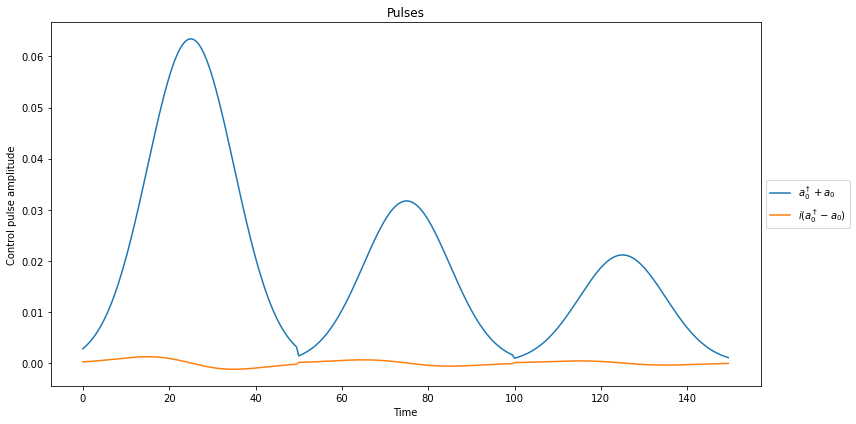

In [27]:
eth.plot_pulses(title='Pulses')

## Execute quantum circuit

In [34]:
result = eth.run_state(init_state = basis(3,0), qc = qc, analytical = False)
final_state = result.states[-1]

In [36]:
# project onto qubit subspace
qubit_state = Qobj(final_state.data[0:2], dims = [[2],[1]])

# normalize qubit state
qubit_state_norm = qubit_state / qubit_state.norm()

# target state
target_state = rx(pi/3)*rx(pi/2)*rx(pi)*basis(2,0)

# fidelity
fid = fidelity(target_state, qubit_state_norm)
print('Fidelity = %s %%' % round(fid*100,4)) # Should be close to 100 %

Fidelity = 99.9998 %


# Two qubit test

## Quantum Circuit

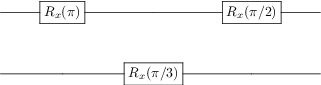

In [43]:
# Number of qubits in the system
N = 2

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 1, None, np.pi/3, r"\pi/3")
qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
qc.png

### ETH Processor

In [44]:
from qip.ethprocessor import ETHProcessor

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = N, resonance_freq = omega, anharmonicity = alpha, t1 = None, t2 = None)

tlist, coeffs = eth.load_circuit(qc)

### Plot pulses

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87d1d6fdf0>)

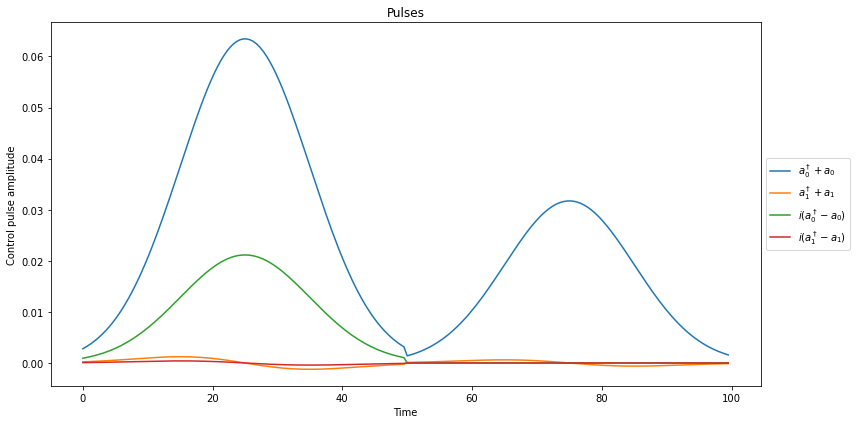

In [45]:
eth.plot_pulses(title='Pulses')

## Run state

In [47]:
psi = tensor(basis(3,0),basis(3,0)) # vacuum
result = eth.run_state(init_state = psi, qc = qc, analytical=False)
final_state = result.states[-1]

In [22]:
# project onto qubit subspace
qubit_state = (tensor(basis(2,0),basis(2,0))*tensor(basis(3,0),basis(3,0)).dag() \
               + tensor(basis(2,1),basis(2,1))*tensor(basis(3,1),basis(3,1)).dag() \
               + tensor(basis(2,0),basis(2,1))*tensor(basis(3,0),basis(3,1)).dag() \
               + tensor(basis(2,1),basis(2,0))*tensor(basis(3,1),basis(3,0)).dag())*final_state

# normalize
qubit_state = qubit_state / qubit_state.norm()

# target state
target_state = tensor(rx(np.pi), rx(np.pi)) * tensor(basis(2,0),basis(2,0))

print(target_state)

# fidelity
fid = fidelity(qubit_state,target_state)
print('Fidelity = %s %%' % round(fid*100,4)) # Should be close to 100 %

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [-1.]]
Fidelity = 1.0
